# Demo of Evaluation and Benchmarking Functionalities

The following examples have been vastly implemented in functions in the file CellAnalysis/eval.py, CellAnalysis/adc_metric.py and in the modified package mAP_3Dvolume that has been forked from https://github.com/ygCoconut/mAP_3Dvolume. 

In [1]:
import os
import sys
path = os.path.dirname(os.path.abspath(""))+"/"
sys.path.append(path)

In [2]:
from CellAnalysis.eval import benchmark
import matplotlib.pyplot as plt

In [3]:
from CellAnalysis.eval import benchmark
import os

path = os.path.dirname(os.path.abspath(""))+"/"
file_root = path + 'example_data/benchmark/2P Functional Planes'
benchmark = benchmark(file_root, resolution=(0.6, 0.6))


Load data of type 2P Functional Planes ...
Load 24 Ground Truth test instance(s) ...
Load prediction mask instance(s) from models: ['Cellpose', 'U3D-BCD', 'Stardist'] ...
Dataloading finished succesfully!
Instance no. 12 in your data from model Cellpose shows no IoU matches with the provided ground truth. No ADC scores will be calculated for this sample.
Instance no. 12 in your data from model U3D-BCD shows no IoU matches with the provided ground truth. No ADC scores will be calculated for this sample.


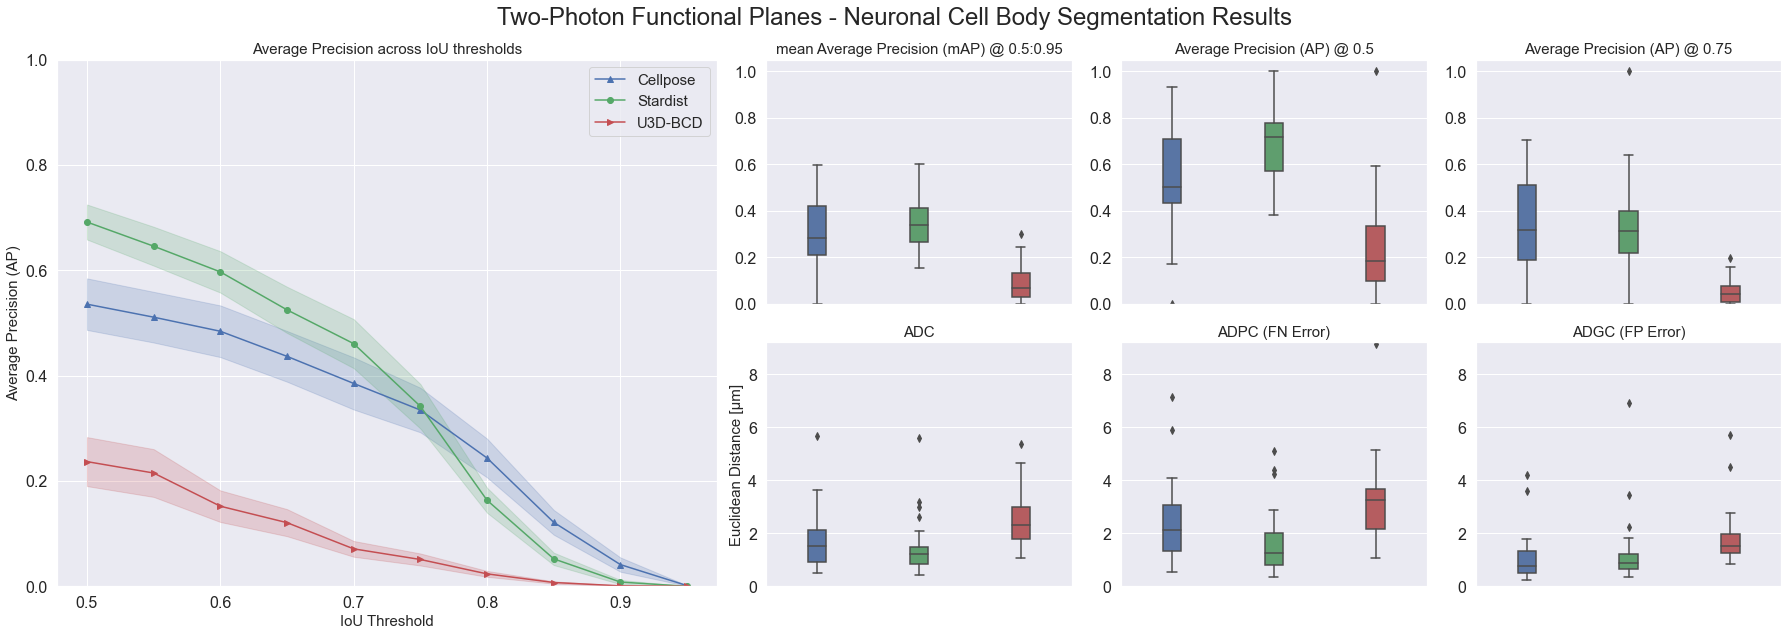

In [4]:
benchmark.summarize(title='Two-Photon Functional Planes - Neuronal Cell Body Segmentation Results', save_to_file=False, error_bands=True, figsize=(25, 9))

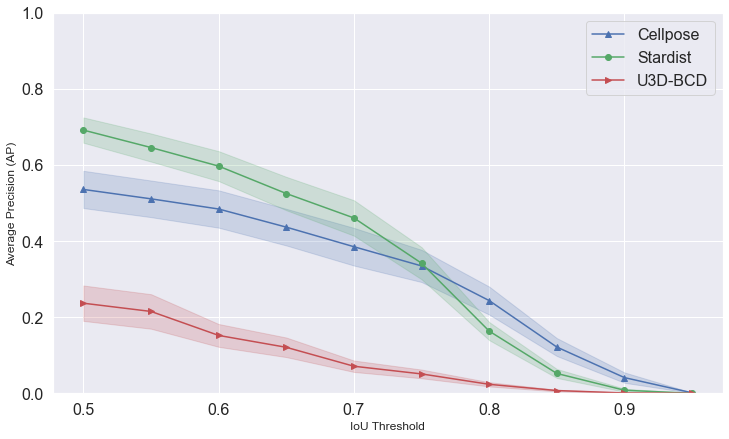

In [5]:
benchmark.plot_ap_curves(error_band=True)

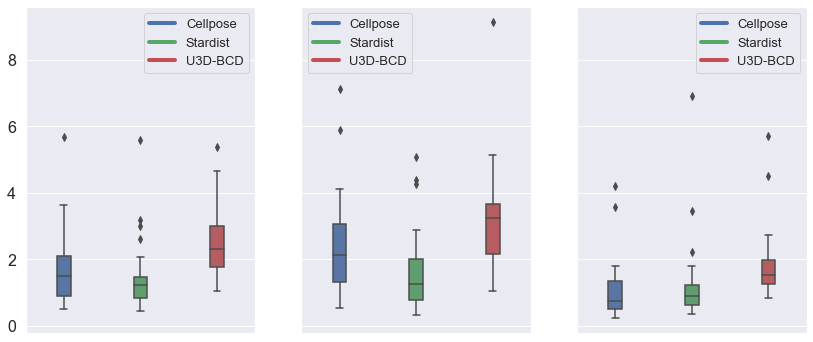

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,6), sharey=True)

ax1 = benchmark.plot_error_bars(ax=ax1, metric='adc', legend_fontsize=13)
ax2 = benchmark.plot_error_bars(ax=ax2, metric='adpc', legend_fontsize=13)
ax3 = benchmark.plot_error_bars(ax=ax3, metric='adgc', legend_fontsize=13)

In [9]:
benchmark.show_adc_scores()

----------------------------------------------------------------------------------------------------
Compute distance metrics for Cellpose for 2P Functional Planes...

Average Distance between Centroids for Cellpose:                                       1.785 ± 0.472
Average Distance between Prediction Centroids for Cellpose:                            2.450 ± 0.572
Average Distance between Ground Truth Centroids for Cellpose:                          1.120 ± 0.372
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Compute distance metrics for Stardist for 2P Functional Planes...

Average Distance between Centroids for Stardist:                                       1.471 ± 0.429
Average Distance between Prediction Centroids for Stardist:                            1.665 ± 0.441
Average Distance between Ground Truth Centroids for Stardi

<AxesSubplot:>

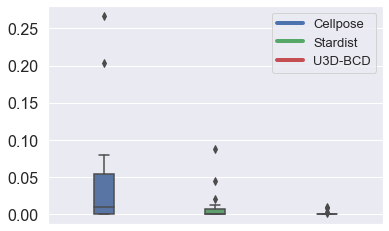

In [10]:
benchmark.plot_error_bars(metric='AP @ 0.9', legend_fontsize=13)

In [11]:
from CellAnalysis.eval import evaluate

In [12]:
file_root = path + 'example_data/evaluate/EM Data'
evala = evaluate(file_root, resolution=(0.51, 0.51, 0.51))

Load data of type EM Data ...
Load 3 Ground Truth test instance(s) ...
Dataloading finished succesfully!


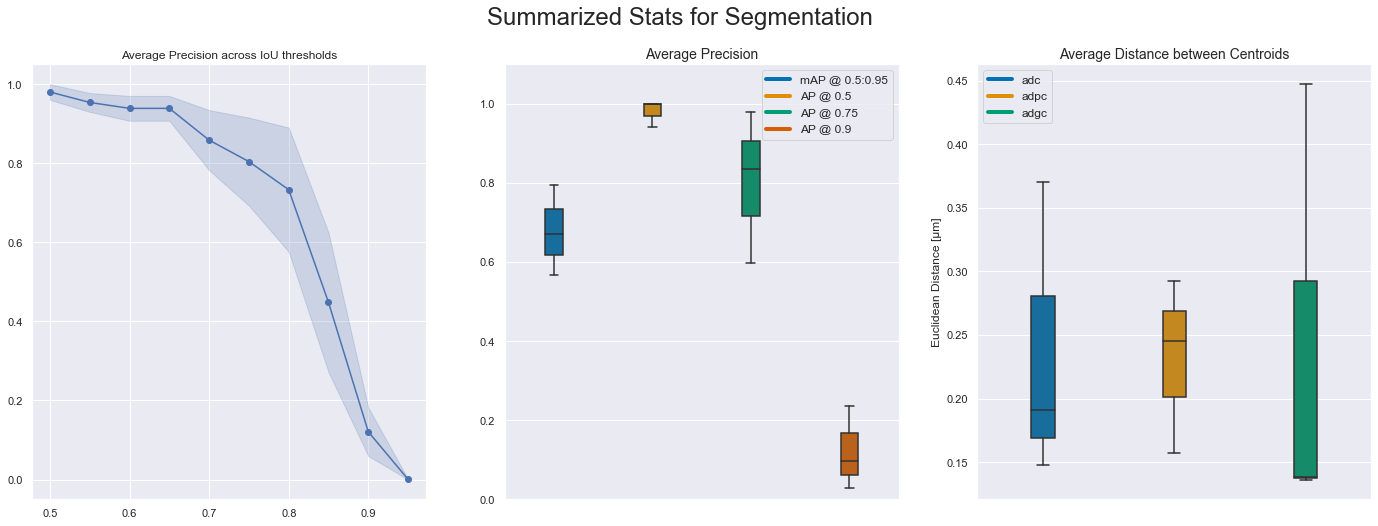

In [13]:
evala.summarize(figsize=(24, 8), error_bands=True)

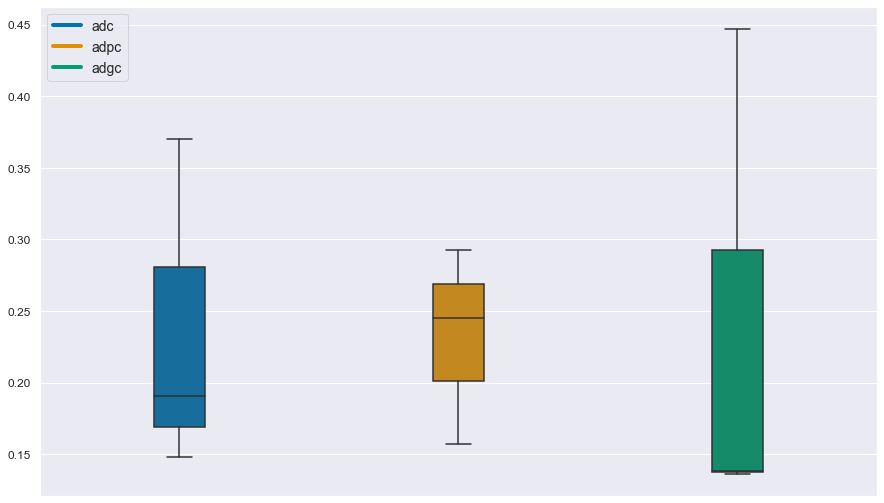

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 9))
sns.set()
evala.box_plots(ax, legend_font_size=14, legend_loc='upper left')
plt.show()

In [15]:
evala.adc_full

{'adc': {0: 0.14777355279499915,
  1: 0.3700228905680367,
  2: 0.19086303310019131},
 'adpc': {0: 0.15708172827836311,
  1: 0.29284711563337557,
  2: 0.24527974406763228},
 'adgc': {0: 0.13846537731163516,
  1: 0.4471986655026978,
  2: 0.13644632213275035},
 'adc_sem': {0: 0.04440908412872508,
  1: 0.197342662606684,
  2: 0.0652259763929012},
 'adpc_sem': {0: 0.04578782887231214,
  1: 0.16515307039103921,
  2: 0.11047912003630561},
 'adgc_sem': {0: 0.04303033938513802,
  1: 0.2295322548223288,
  2: 0.019972832749496804}}

In [16]:
evala.match_stats

{'tp': array([32.33333333, 31.33333333, 31.        , 31.        , 29.        ,
        28.        , 25.        , 20.        ,  9.66666667,  0.66666667]),
 'fp': array([ 1.66666667,  2.66666667,  3.        ,  3.        ,  5.        ,
         6.        ,  9.        , 14.        , 24.33333333, 33.33333333]),
 'fn': array([ 2.        ,  3.        ,  3.33333333,  3.33333333,  5.33333333,
         6.33333333,  9.33333333, 14.33333333, 24.66666667, 33.66666667]),
 'precision': array([0.93402778, 0.90509259, 0.88842593, 0.88842593, 0.79803241,
        0.77094907, 0.66493056, 0.4744213 , 0.22719907, 0.01041667]),
 'recall': array([0.92952668, 0.89966243, 0.88378941, 0.88378941, 0.7955613 ,
        0.76943188, 0.66581915, 0.47351864, 0.22812612, 0.01025641]),
 'accuracy': array([0.87591803, 0.82953761, 0.79995608, 0.79995608, 0.67022977,
        0.63369809, 0.51389607, 0.3315331 , 0.13243181, 0.00524934]),
 'f1': array([0.93133097, 0.90194744, 0.88568728, 0.88568728, 0.79643105,
        0.76983